# Recycling data

## Massachusetts Data

In [13]:
%matplotlib notebook

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
mu19 = pd.read_csv("datasets/mudata19.csv")
mu19

,Municipality Name,Contact Name,Total Number of Households,Households Served by Municipal Trash Program,Households Served by Municipal Recycling Program,Trash Service Type,Carts for Trash,Trash Cart size,Recycling Service Type,Recycling Collection Frequency,...,Medical Waste (Sharps),Textiles/Used Clothing.1,Bulky Rigid Plastic.1,Books/Media,Plastic Film,Fire Extinguishers,Did your municipality host comprehensive household hazardous waste collection events in 2019?,How many events?,Regional,Reciprocal
0,Abington,Angela Dahlstrom,6558.0,4486.0,4486.0,Curbside,Yes,64.0,Curbside,Weekly,...,Year Round,Year Round,0,Year Round,0,0,Yes,1.0,Yes,Yes
1,Acton,Corey York,9800.0,3846.0,4335.0,Drop-off,NaN,NaN,Drop-off,NaN,...,Year Round,Year Round,Year Round,Year Round,NaN,Year Round,Yes,2.0,No,No
2,Acushnet,Dan Menard,4304.0,3591.0,3591.0,Curbside,Yes,65.0,Both,Bi-weekly,...,Year Round,0,0,0,0,0,No,NaN,NaN,NaN
3,Adams,Linda Cernik,3867.0,664.0,664.0,Drop-off,NaN,NaN,Drop-off,NaN,...,< 6,Year Round,Between 6 & 11,Year Round,NaN,Year Round,Yes,1.0,Yes,No
4,Agawam,Tracy DeMaio,12031.0,8879.0,8879.0,Curbside,Yes,65.0,Curbside,Bi-weekly,...,Year Round,< 6,0,Year Round,0,0,Yes,1.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Woburn,Meghan Doherty,13218.0,11240.0,11240.0,Curbside,NaN,NaN,Curbside,Bi-weekly,...,0,0,0,0,0,0,No,NaN,NaN,NaN
348,Worcester,Robert J. Fiore,67000.0,53000.0,67000.0,Curbside,NaN,NaN,Both,Weekly,...,< 6,Year Round,Year Round,Year Round,0,Once a Week,Yes,2.0,No,No
349,Worthington,Kathleen A. Casey,532.0,362.0,362.0,Drop-off,NaN,NaN,Drop-off,NaN,...,0,Year Round,0,Year Round,0,Year Round,No,NaN,NaN,NaN
350,Wrentham,Mike Lavin,4322.0,4048.0,4048.0,Curbside,Yes,35.0,Curbside,Bi-weekly,...,0,Year Round,< 6,Year Round,0,< 6,Yes,1.0,No,No


<IPython.core.display.Javascript object>


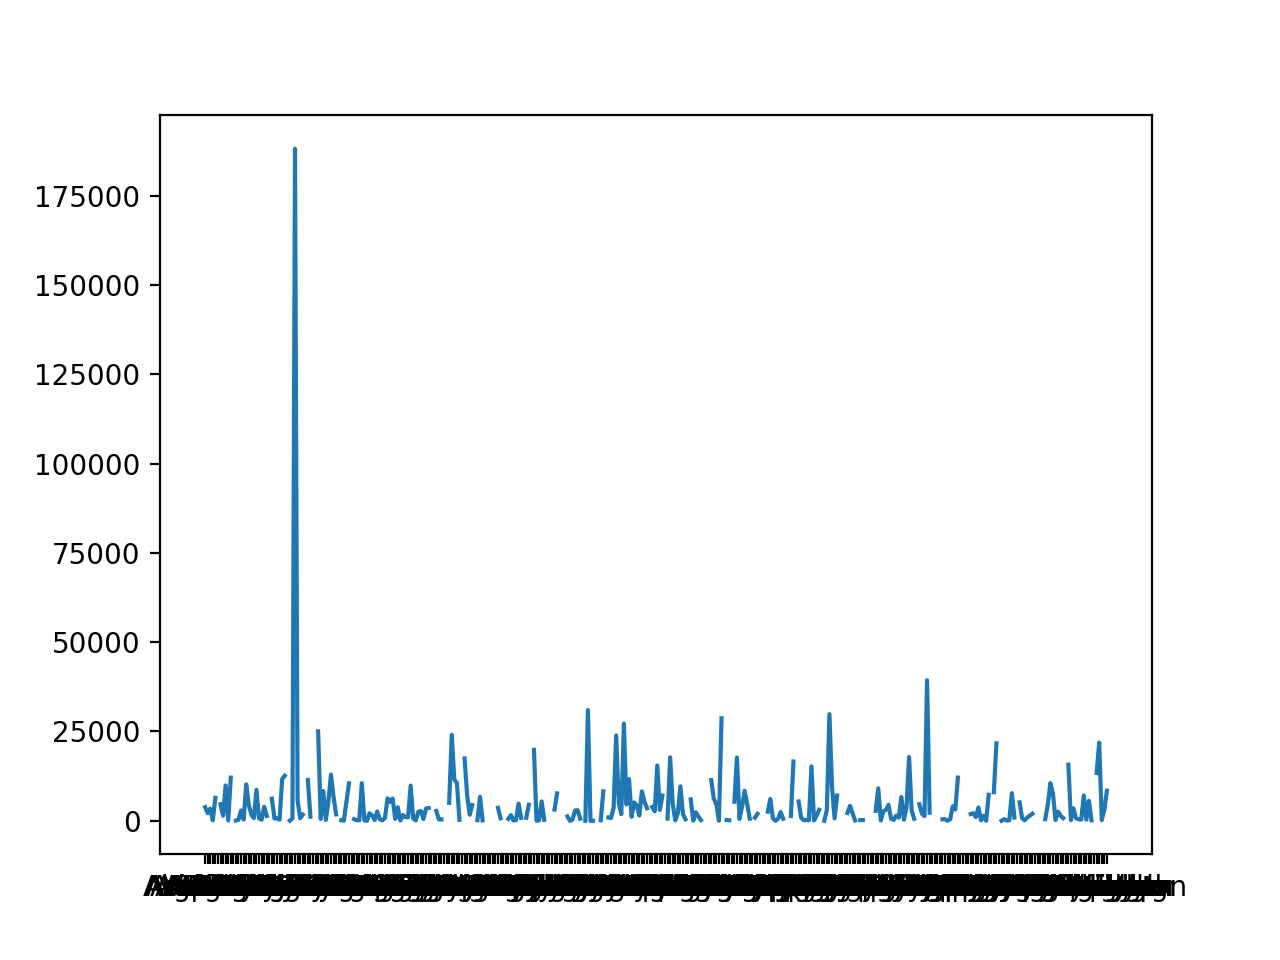

In [16]:
plt.plot(mu19["Municipality Name"], mu19["Trash Disposal Tonnage"])
plt.show()